In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from wordcloud import WordCloud, STOPWORDS


#Importing the basic librarires for building model
from sklearn.linear_model import LinearRegression  ,BayesianRidge,HuberRegressor,ARDRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR


##Z poprzedniego projketu
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import ensemble
from keras import layers, models, optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import re

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
import pickle


Import danych związanych z cenami aut w Polsce

In [41]:
df = pd.read_csv('Car_Prices_Poland_Kaggle.csv', encoding='utf-8')

Sprawdzenie z jakimi danymi mamy doczynienia

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


##Sprawdzenie ilosci pustych wierszy

In [43]:
df.isna().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [44]:
##Usunecie niepotrzebnych danych

In [45]:
df.drop(columns=["generation_name","Unnamed: 0"],inplace=True)

Sprawdzenie ilosci pustych wierszy

In [46]:
df.isna().sum()

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

Sprawdzenie danych w tabeli

In [47]:
df.describe().round(2)

,year,mileage,vol_engine,price
count,117927.00,117927.00,117927.00,117927.00
mean,2012.93,140976.79,1812.06,70299.88
std,5.69,92369.36,643.61,84824.58
min,1945.00,0.00,0.00,500.00
25%,2009.00,67000.00,1461.00,21000.00
50%,2013.00,146269.00,1796.00,41900.00
75%,2018.00,203000.00,1995.00,83600.00
max,2022.00,2800000.00,7600.00,2399900.00


Ujednolicenie danych

In [48]:
df["mark"].unique()

array(['opel', 'audi', 'bmw', 'volkswagen', 'ford', 'mercedes-benz',
       'renault', 'toyota', 'skoda', 'alfa-romeo', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'kia', 'mazda', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'seat', 'volvo'], dtype=object)

In [49]:
df.head(20)

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
5,opel,combo,2017,121203,1598,Diesel,Warszawa,Mazowieckie,51900
6,opel,combo,2017,119965,1248,Diesel,Wrocław,Dolnośląskie,44700
7,opel,combo,2016,201658,1248,Diesel,Lublin,Lubelskie,29000
8,opel,combo,2014,178666,1598,Diesel,Złotów,Wielkopolskie,28900
9,opel,combo,2015,113000,1248,Diesel,Strzyżew,Mazowieckie,34900


In [50]:
df_matrix = df.corr()

In [51]:
df_matrix

,year,mileage,vol_engine,price
year,1.000000,-0.731958,-0.161557,0.596181
mileage,-0.731958,1.000000,0.206169,-0.542808
vol_engine,-0.161557,0.206169,1.000000,0.299669
price,0.596181,-0.542808,0.299669,1.000000


In [52]:
df_matrix["price"].sort_values(ascending=False)

price         1.000000
year          0.596181
vol_engine    0.299669
mileage      -0.542808
Name: price, dtype: float64

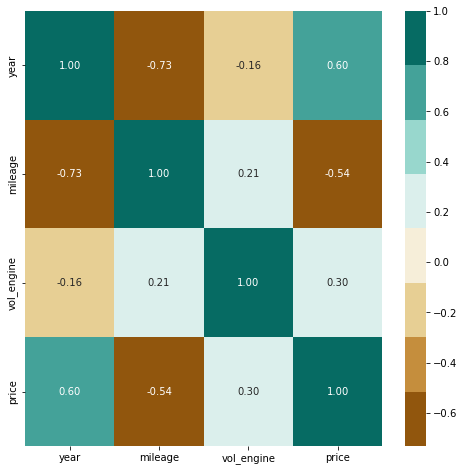

In [53]:
fig, ax = plt.subplots(figsize=(8, 8))
colormap =  sns.color_palette("BrBG", 8)
sns.heatmap(df_matrix, cmap=colormap, annot=True, fmt=".2f")
ax.set_yticklabels(['year','mileage', 'vol_engine', 'price']);
plt.show()

<AxesSubplot:>

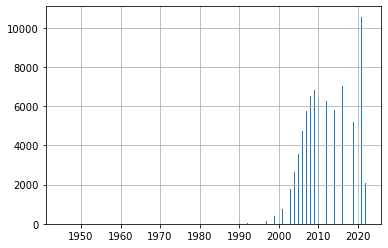

In [54]:
df['year'].hist(bins=500)

<AxesSubplot:>

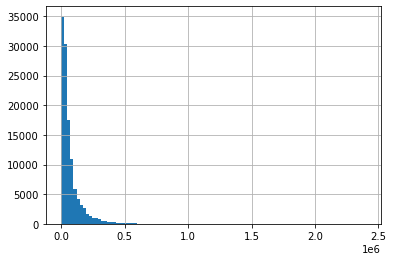

In [55]:
df['price'].hist(bins=100)

<AxesSubplot:ylabel='Density'>

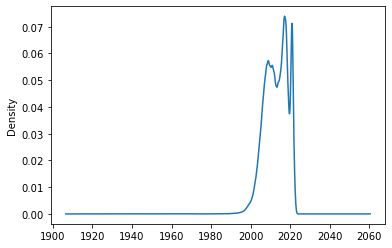

In [56]:
df['year'].plot.kde()

<AxesSubplot:ylabel='Density'>

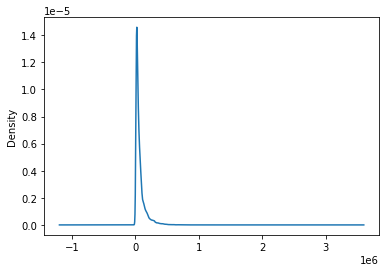

In [57]:
df['price'].plot.kde()

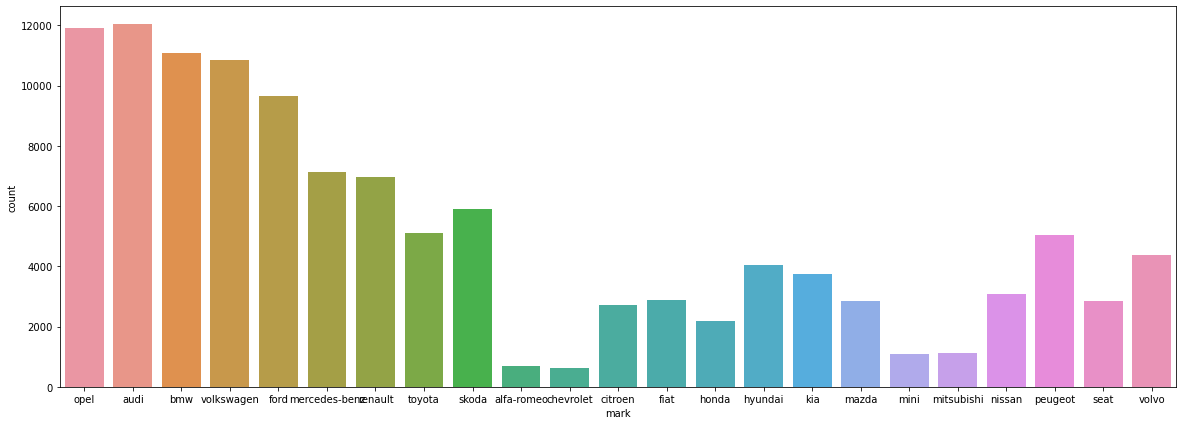

In [58]:
plt.figure(figsize=(20,7))
sns.countplot(df["mark"])
plt.show()

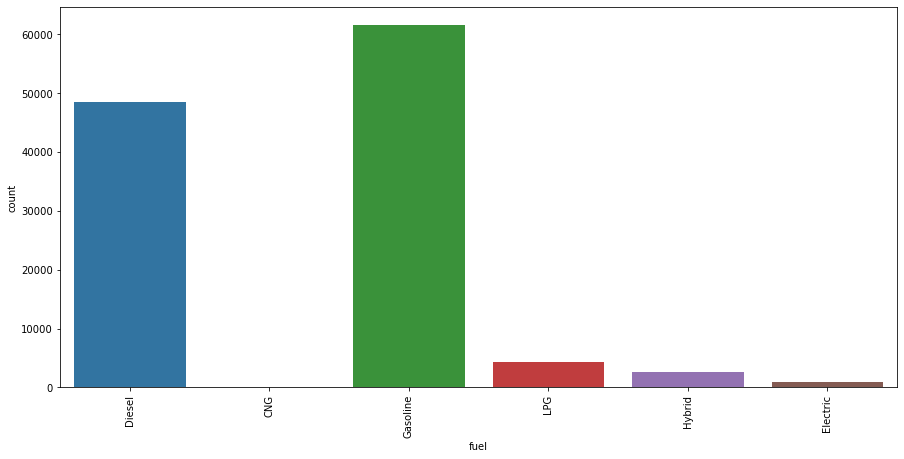

In [59]:
plt.figure(figsize=(15,7))
sns.countplot(df["fuel"])
plt.xticks(rotation=90)
plt.show()

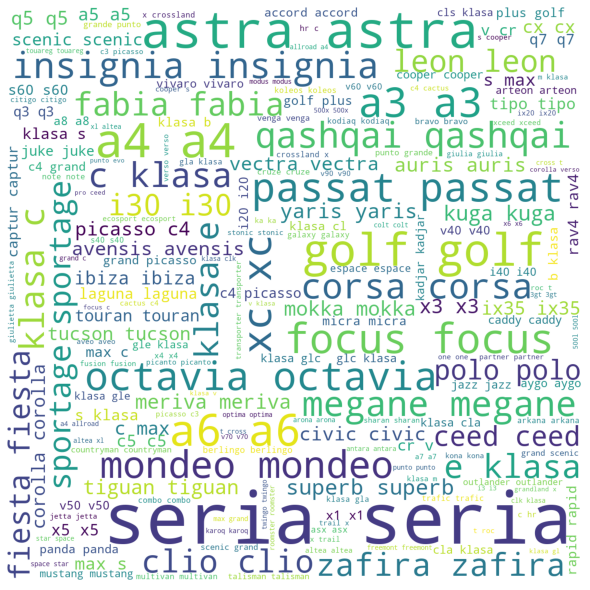

In [60]:
comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df.model:
     
    val = str(val)
 
    tokens = val.split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [61]:
dummies = pd.get_dummies(df['fuel'])
df = pd.concat([df, dummies], axis=1)

df.head()

,mark,model,year,mileage,vol_engine,fuel,city,province,price,CNG,Diesel,Electric,Gasoline,Hybrid,LPG
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900,0,1,0,0,0,0
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501,0,1,0,0,0,0
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000,0,1,0,0,0,0
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800,0,1,0,0,0,0
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900,1,0,0,0,0,0


In [62]:
df.drop('fuel', axis=1)

,mark,model,year,mileage,vol_engine,city,province,price,CNG,Diesel,Electric,Gasoline,Hybrid,LPG
0,opel,combo,2015,139568,1248,Janki,Mazowieckie,35900,0,1,0,0,0,0
1,opel,combo,2018,31991,1499,Katowice,Śląskie,78501,0,1,0,0,0,0
2,opel,combo,2015,278437,1598,Brzeg,Opolskie,27000,0,1,0,0,0,0
3,opel,combo,2016,47600,1248,Korfantów,Opolskie,30800,0,1,0,0,0,0
4,opel,combo,2014,103000,1400,Tarnowskie Góry,Śląskie,35900,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117922,volvo,xc-90,2020,40000,1969,Katowice,Śląskie,222790,0,0,0,0,1,0
117923,volvo,xc-90,2017,51000,1969,Chechło Pierwsze,Łódzkie,229900,0,1,0,0,0,0
117924,volvo,xc-90,2016,83500,1969,Pruszcz Gdański,Pomorskie,135000,0,0,0,1,0,0
117925,volvo,xc-90,2017,174000,1969,Kalisz,Wielkopolskie,154500,0,1,0,0,0,0


In [63]:
LE=LabelEncoder()
LE.fit(df["mark"])
df["Mark"]=LE.transform(df["mark"])


df.drop(columns=["mark","model","fuel","city","province"],axis=1 ,inplace=True )

df.head()

,year,mileage,vol_engine,price,CNG,Diesel,Electric,Gasoline,Hybrid,LPG,Mark
0,2015,139568,1248,35900,0,1,0,0,0,0,15
1,2018,31991,1499,78501,0,1,0,0,0,0,15
2,2015,278437,1598,27000,0,1,0,0,0,0,15
3,2016,47600,1248,30800,0,1,0,0,0,0,15
4,2014,103000,1400,35900,1,0,0,0,0,0,15


In [64]:
X = df.drop(columns="price")           
y = df["price"]

In [65]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True,)

In [66]:
models = {
    "Linear Regression": LinearRegression(),
    "SGD Regressor": SGDRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine": LinearSVR(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGB Regressor": XGBRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Fitted {name}")

Fitted Linear Regression
Fitted SGD Regressor
Fitted K-Nearest Neighbors
Fitted Support Vector Machine
Fitted Decision Tree
Fitted Random Forest
Fitted XGB Regressor


In [67]:
for name, model in models.items():
    print(f"{name} R^2 score: {model.score(X_test, y_test):.4f}")

Linear Regression R^2 score: 0.6065
SGD Regressor R^2 score: 0.6051
K-Nearest Neighbors R^2 score: 0.8970
Support Vector Machine R^2 score: 0.2264
Decision Tree R^2 score: 0.8492
Random Forest R^2 score: 0.8951
XGB Regressor R^2 score: 0.9061


In [68]:
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (94341, 10)
X Test  :  (23586, 10)
Y Train :  (94341,)
Y Test  :  (23586,)


In [73]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    
    score_values = [
        r2_score(y_test, y_pred),
        mean_squared_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred),
        median_absolute_error(y_test,y_pred)
    ]
    return score_values

In [74]:
#Model XGB Regressor
accuracy = train_model(XGBRegressor(), X_train, y_train, X_test, y_test)
accuracy_compare = {'XGB': accuracy[0]}
mean_squared_error_compare = {'XGB': accuracy[1]}
mean_absolute_error_compare = {'XGB': accuracy[2]}
median_absolute_error_compare ={'XGB': accuracy[3]}
print ("XGB: ", accuracy)


XGB:  [0.9061018247214743, 658641022.7816695, 12311.731764503647, 5660.03515625]


In [75]:
def get_score_xgb(n_estimators):
    xgb = XGBRegressor(n_estimators=n_estimators,
                       learning_rate=0.04, 
                       n_jobs=4, 
                       random_state=42)
    
    xgb.fit(X_train, y_train)
    
    return xgb.score(X_test, y_test)

In [76]:
results_xgb = {}
estimators = [1000, 1300]

for i in estimators:
    results_xgb[i] = get_score_xgb(i)
    print(f"Fitted XGB with {i} estimators")

Fitted XGB with 1000 estimators
Fitted XGB with 1300 estimators


In [77]:
#MODEL XGB REGRESSOR WITH FINE TUNING
XGBRegressor_model= XGBRegressor(n_estimators=1300, learning_rate=0.04, n_jobs=4, random_state=42)
accuracy = train_model(XGBRegressor_model, X_train, y_train, X_test, y_test)
accuracy_compare['XGB REGRESSOR FINE TUNING'] = accuracy[0]
mean_squared_error_compare['XGB REGRESSOR FINE TUNING'] = accuracy[1]
mean_absolute_error_compare['XGB REGRESSOR FINE TUNING'] = accuracy[2]
median_absolute_error_compare['XGB REGRESSOR FINE TUNING'] = accuracy[3]
print ("XGB REGRESSOR FINE TUNING: ", accuracy)
 

XGB REGRESSOR FINE TUNING:  [0.9078411928396768, 646440368.2644912, 12048.080029775096, 5422.560546875]


In [78]:
#Model RANDOM FORREST REGRESSOR
accuracy = train_model(RandomForestRegressor(), X_train, y_train, X_test, y_test)
accuracy_compare['RF REGGRESSOR'] = accuracy[0]
mean_squared_error_compare['RF REGGRESSOR'] = accuracy[1]
mean_absolute_error_compare['RF REGGRESSOR'] = accuracy[2]
median_absolute_error_compare['RF REGGRESSOR'] = accuracy[3]
print ("RF REGGRESSOR: ", accuracy)

RF REGGRESSOR:  [0.8972031208754191, 721060248.5569481, 12147.768222394376, 4989.360904761903]


In [79]:
def get_score_random_forest(n_estimators):
    random_forest = RandomForestRegressor(n_estimators=n_estimators,
                       n_jobs=4, 
                       random_state=42)
    
    random_forest.fit(X_train, y_train)
    
    return  random_forest.score(X_test, y_test)

In [80]:
results_random_forest = {}
estimators = [1000, 1300]

for i in estimators:
    results_random_forest[i] = get_score_random_forest(i)
    print(f"Fitted Random Forest with {i} estimators")

Fitted Random Forest with 1000 estimators
Fitted Random Forest with 1300 estimators


In [81]:
#Model RANDOM FORREST REGRESSOR WITH FINE TUNING
RandomForestRegressor_model=RandomForestRegressor(n_estimators=1300,  n_jobs=4, random_state=42)
accuracy = train_model(RandomForestRegressor_model, X_train, y_train, X_test, y_test)
accuracy_compare['RF REGRESSOR FINE TUNING'] = accuracy[0]
mean_squared_error_compare['RF REGRESSOR FINE TUNING'] = accuracy[1]
mean_absolute_error_compare['RF REGRESSOR FINE TUNING'] = accuracy[2]
median_absolute_error_compare['RF REGRESSOR FINE TUNING'] = accuracy[3]
print ("RF REGRESSOR FINE TUNING: ", accuracy)
 

RF REGRESSOR FINE TUNING:  [0.8958374484024291, 730639645.7254957, 12125.576059077743, 4971.721923076925]


<AxesSubplot:>

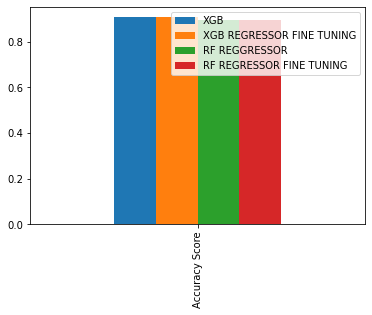

In [118]:
df_accuracy_compare = pd.DataFrame(accuracy_compare, index = ['Accuracy Score'])
df_accuracy_compare.plot(kind='bar')

In [120]:
df_accuracy_compare

,XGB,XGB REGRESSOR FINE TUNING,RF REGGRESSOR,RF REGRESSOR FINE TUNING
Accuracy Score,0.906102,0.907841,0.897203,0.895837


<AxesSubplot:>

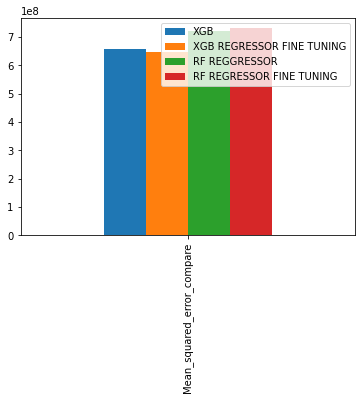

In [121]:
df_mean_squared_error_compare = pd.DataFrame(mean_squared_error_compare, index = ['Mean_squared_error_compare'])
df_mean_squared_error_compare.plot(kind='bar')

In [122]:
df_mean_squared_error_compare

,XGB,XGB REGRESSOR FINE TUNING,RF REGGRESSOR,RF REGRESSOR FINE TUNING
Mean_squared_error_compare,6.586410e+08,6.464404e+08,7.210602e+08,7.306396e+08


In [86]:
df_mean_absolute_error_compare = pd.DataFrame(mean_absolute_error_compare, index = ['Mean_absolute_error_compare'])
df_mean_absolute_error_compare.plot(kind='bar')

In [123]:
df_mean_absolute_error_compare

,XGB,XGB REGRESSOR FINE TUNING,RF REGGRESSOR,RF REGRESSOR FINE TUNING
Mean_absolute_error_compare,12311.731765,12048.08003,12147.768222,12125.576059


<AxesSubplot:>

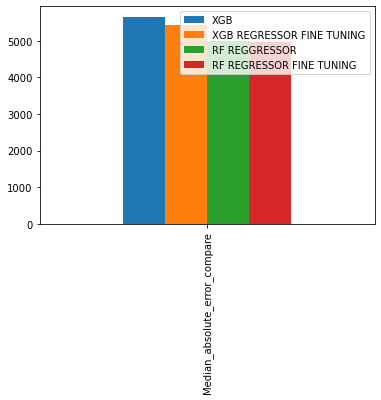

In [126]:
df_median_absolute_error_compare = pd.DataFrame(median_absolute_error_compare, index = ['Median_absolute_error_compare'])
df_median_absolute_error_compare.plot(kind='bar')

In [127]:
df_median_absolute_error_compare

,XGB,XGB REGRESSOR FINE TUNING,RF REGGRESSOR,RF REGRESSOR FINE TUNING
Median_absolute_error_compare,5660.035156,5422.560547,4989.360905,4971.721923


In [93]:
def saveModel(model):
    pickle.dump(model, open('model.pkl', 'wb'))

In [94]:
saveModel(RandomForestRegressor_model)

In [104]:
def loadModel(model_fine):
    with open(model_fine, 'rb') as handle:
        clf = pickle.load(handle)

In [105]:
loadedModel=loadModel('model.pkl')